In [5]:
import glob
import singPartDist as sp
import detectInstantons as dI
import numpy as np
import pylab as pl
import pandas as pd


### Specify the files and the parameters of the trajectory ###

In [2]:
fileName = glob.glob('/media/xn18583/Elements/allBC3/dataTrond/KA_21/glass/T0.48/forFascilitation/T0.48_N10002_NVT_KA21_step_1LJ_startFrame*20.xyz') 
print(len(fileName), ' files found.')
rho=1.4               # number density
N = 10002             # number of particles 
L  = (N/rho)**(1./3.) # box length (square box assumed)
ta = 200              # excitation fit length
a = 0.5               # threshold for excitation detection
numFrames = 1001    # number of frames



5  files found.


In [3]:
excitationIDs = pd.DataFrame(columns = [ 'fileID', 'particleID', 't_0', 'deltat','amplitude']) # results file
for xyzfile in fileName:
    fileID= str(int(xyzfile[xyzfile.find('startFrame')+10:xyzfile.find('.xyz')]))       # find the file ID (in my case frame from the run was started)
    instantonIDs,failCount = dI.detect(xyzfile,fileID,ta,a,N,numFrames,L)                  # find instantons in file
    print('In run ',fileID, 'the algorithm detected ',len(instantonIDs), 'excitations.')	
    print('The fit failed ',failCount[0],' times and deltat was too long ',failCount[1],' times!')
    excitationIDs = pd.concat([excitationIDs,instantonIDs])                             # add instantons detected in this file to results


100%|█████████████████████████████████████████████████████████████| 10002/10002 [00:27<00:00, 365.28it/s]


In run  220 the algorithm detected  22 excitations.
The fit failed  0  times and deltat was too long  0  times!


100%|█████████████████████████████████████████████████████████████| 10002/10002 [01:11<00:00, 140.15it/s]


In run  20 the algorithm detected  73 excitations.
The fit failed  0  times and deltat was too long  0  times!


100%|█████████████████████████████████████████████████████████████| 10002/10002 [00:45<00:00, 220.02it/s]


In run  120 the algorithm detected  40 excitations.
The fit failed  0  times and deltat was too long  2  times!


100%|█████████████████████████████████████████████████████████████| 10002/10002 [00:34<00:00, 290.25it/s]


In run  320 the algorithm detected  30 excitations.
The fit failed  0  times and deltat was too long  0  times!


100%|█████████████████████████████████████████████████████████████| 10002/10002 [00:34<00:00, 287.30it/s]

In run  420 the algorithm detected  32 excitations.
The fit failed  0  times and deltat was too long  0  times!


In [7]:
excitationIDs.to_csv('excitation_example.csv', index=False)                # save results

In [8]:
# inspect results
excitationIDs.head()

,fileID,particleID,t_0,deltat,amplitude
0,220,567,328.483498,2.251033,0.492876
1,220,600,497.938030,1.681909,0.448851
2,220,1322,514.862374,124.834909,0.636103
3,220,1463,328.146400,2.497262,0.658990
4,220,3707,486.519640,2.133311,0.541377


### Average number of excitations per frame ###

In [9]:
excitationIDs.groupby('fileID').particleID.count().mean()

39.4

### Distribution of jump durations $\Delta t$ ###

Many more files are required at this temperature to obtain decent statistics

Text(0, 0.5, '$p(\\Delta t)$')

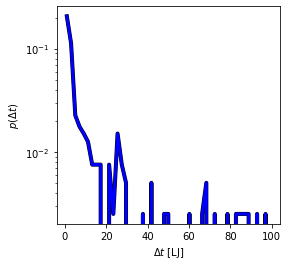

In [10]:
pl.figure(figsize = (4,4))
bins = np.linspace(0, 100, 50)
centres = (bins[1:] + bins[:-1]) / 2
hist, cen = np.histogram(list(excitationIDs.deltat),bins = bins,density= True)
pl.semilogy(centres,hist,linewidth=4,color='black')
pl.semilogy(centres,hist,linewidth=3,color='blue')
pl.xlabel(r'$\Delta t$ [LJ]')
pl.ylabel(r'$p(\Delta t)$')